In [1]:
# use legacy keras for compatibility
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# pollens (value 0 to 5)

ALDER
ASH
BIRCH
COTTONWOOD
ELM
MAPLE
OLIVE
JUNIPER
OAK
PINE
CYPRESS_PINE
HAZEL
GRAMINALES
JAPANESE_CEDAR
JAPANESE_CYPRESS
RAGWEED
MUGWORT

# medications (value 0 to 10)
Azelastine (Astepro)
Ketotifen (Alaway, Zaditor)
Olopatadine (Pataday)
Cetirizine (Zyrtec Allergy)
Loratadine (Alavert, Claritin)
Fexofenadine (Allegra Allergy)
Desloratadine (Clarinex)
Mometasone (Nasonex)
Fluticasone propionate (Flonase Allergy Relief)
Ciclesonide (Zetonna)
Loteprednol (Alrex, Lotemax)
Prednisolone (Omnipred, Pred Forte, others)
Prednisolone (Prelone)
Methylprednisolone (Medrol)

# symptoms (value 1 to 3)
Congestion
Watery Eyes
Itchy Eyes
Sinus Pressure
Sneezing

In [2]:
import pandas as pd
import numpy as np

# Define the possible values
pollens = ["ALDER", "ASH", "BIRCH", "COTTONWOOD", "ELM", "MAPLE", "OLIVE", "JUNIPER", "OAK", "PINE", 
           "CYPRESS_PINE", "HAZEL", "GRAMINALES", "JAPANESE_CEDAR", "JAPANESE_CYPRESS", "RAGWEED", "MUGWORT"]
medications = ["Azelastine", "Ketotifen", "Olopatadine", "Cetirizine", "Loratadine", "Fexofenadine", 
               "Desloratadine", "Mometasone", "Fluticasone", "Ciclesonide", "Loteprednol", 
               "Prednisolone_1", "Prednisolone_2", "Methylprednisolone"]
symptoms = ["Congestion", "Watery Eyes", "Itchy Eyes", "Sinus Pressure", "Sneezing"]

# Number of samples
num_samples = 5000

# Generate synthetic data
data = []
for _ in range(num_samples):
    # Generate random pollen levels (0-5)
    pollen_levels = {p: np.random.randint(0, 6) for p in pollens}
    
    # Compute an overall "pollen exposure" score (sum of selected pollen levels)
    pollen_exposure = sum([pollen_levels[p] for p in ["OAK", "PINE", "BIRCH", "RAGWEED", "GRAMINALES"]])
    
    # Simulate symptom severity based on pollen levels (pre-medication)
    symptom_values_pre_medication = {
        "Congestion": int(np.clip(np.random.normal(pollen_levels["OAK"] + pollen_levels["PINE"], 1), 1, 3)),
        "Watery Eyes": int(np.clip(np.random.normal(pollen_levels["BIRCH"] + pollen_levels["RAGWEED"], 1), 1, 3)),
        "Itchy Eyes": int(np.clip(np.random.normal(pollen_levels["BIRCH"] + pollen_levels["ASH"], 1), 1, 3)),
        "Sinus Pressure": int(np.clip(np.random.normal(pollen_levels["MAPLE"] + pollen_levels["HAZEL"], 1), 1, 3)),
        "Sneezing": int(np.clip(np.random.normal(pollen_levels["RAGWEED"] + pollen_levels["GRAMINALES"], 1), 1, 3))
    }

    # Probability of taking medication increases with pollen exposure
    medication_probability = min(0.1 + 0.15 * (pollen_exposure / 20), 0.95)  # Scales from ~10% to 95%

    # Medication levels depend on whether they are taken and how severe symptoms are
    medication_levels = {
        m: 0 if np.random.rand() > medication_probability else min(np.random.geometric(0.4) + int(pollen_exposure / 10), 10)
        for m in medications
    }
    
    # Store data
    row = {**pollen_levels, **medication_levels, **symptom_values_pre_medication}
    data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_allergy_data.csv", index=False)


2025-02-03 21:36:23.215310: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-03 21:36:23.216008: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 21:36:23.218841: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 21:36:23.226231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738614983.238038  135680 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738614983.24

Epoch 1/50


2025-02-03 21:36:24.942024: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


125/125 [==============================] - 1s 2ms/step - loss: 2.9887 - mae: 1.1843 - val_loss: 1.9759 - val_mae: 0.9318
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 2.0015 - mae: 0.9298 - val_loss: 1.8943 - val_mae: 0.9096
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 1.9501 - mae: 0.9140 - val_loss: 1.8677 - val_mae: 0.8873
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 1.9261 - mae: 0.9002 - val_loss: 1.8564 - val_mae: 0.8884
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 1.9092 - mae: 0.8962 - val_loss: 1.8468 - val_mae: 0.8845
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 1.8962 - mae: 0.8906 - val_loss: 1.8379 - val_mae: 0.8742
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 1.8859 - mae: 0.8840 - val_loss: 1.8291 - val_mae: 0.8770
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 1.8760 - mae:

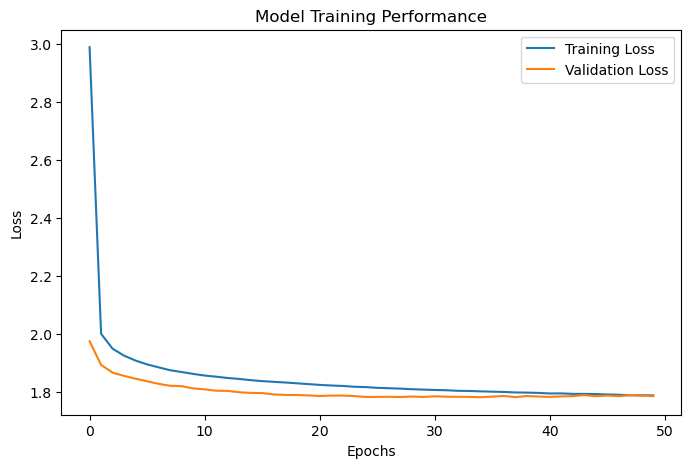

/home/victoria/anaconda3/envs/tf/lib/python3.11/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("synthetic_allergy_data.csv")

# Define input features (pollens) and targets (symptoms & medications)
pollen_features = ["ALDER", "ASH", "BIRCH", "COTTONWOOD", "ELM", "MAPLE", "OLIVE", "JUNIPER", "OAK", "PINE", "CYPRESS_PINE", "HAZEL", "GRAMINALES", "JAPANESE_CEDAR", "JAPANESE_CYPRESS", "RAGWEED", "MUGWORT"]
symptom_targets = ["Congestion", "Watery Eyes", "Itchy Eyes", "Sinus Pressure", "Sneezing"]
medication_targets = ["Azelastine", "Ketotifen", "Olopatadine", "Cetirizine", "Loratadine", "Fexofenadine", "Desloratadine", "Mometasone", "Fluticasone", "Ciclesonide", "Loteprednol", "Prednisolone_1", "Prednisolone_2", "Methylprednisolone"]

# Select features and targets
X = df[pollen_features].values
y_symptoms = df[symptom_targets].values
y_medications = df[medication_targets].values

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_symptoms_train, y_symptoms_test, y_medications_train, y_medications_test = train_test_split(
    X_scaled, y_symptoms, y_medications, test_size=0.2, random_state=42
)

# Define a simple neural network model
input_shape = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(17,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(symptom_targets) + len(medication_targets), activation="linear")  # Outputs for symptoms & medications
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model and store history
history = model.fit(
    X_train, np.hstack((y_symptoms_train, y_medications_train)),
    epochs=50, batch_size=32,
    validation_data=(X_test, np.hstack((y_symptoms_test, y_medications_test)))
)

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

# Save the model for TensorFlow.js
tfjs.converters.save_keras_model(model, "tfjs_model")


In [4]:
import json

mean = scaler.mean_
std = scaler.scale_

# save this for use in the JS code
with open('scaler_mean.json', 'w') as f:
    json.dump(mean.tolist(), f)

with open('scaler_std.json', 'w') as f:
    json.dump(std.tolist(), f)